# Matplotlib

* Overview
* The MATLAB-Style API
* The Object-Oriented API
* More Features
* Further Reading
* Exercise

## Overview

We’ve already generated quite a few figures in these lectures using Matplotlib

Matplotlib is an outstanding graphics library, designed for scientific computing, with

* high quality 2D and 3D plots
* output in all the usual formats (PDF, PNG, etc.)
* LaTeX integration
* animation, etc., etc.

Sure, you will find the odd disgruntled individual who complains about Matplotlib

Typically, this is because they don’t know how to use it properly

Once you do, Matplotlib is a joy to use — powerful, elegant and intuitive

### Matplotlib’s Split Personality

There’s one thing you need to know before we get started

Matplotlib is unusual in that it offers two quite different interfaces to plotting

The first is a simple MATLAB-style API (Application Programming Interface) that was written to help MATLAB refugees find a ready home

The second is a more “Pythonic” object-oriented API

For reasons described below, we strongly recommend that you use the second API

But first, let’s discuss the difference

### The MATLAB-Style API

Let’s cover the MATLAB-style API first

Here’s the kind of easy example you might find in introductory treatments

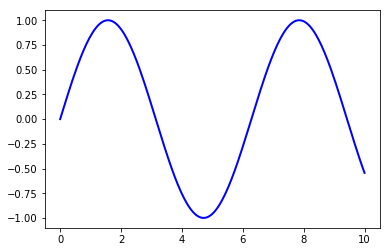

In [2]:
from pylab import *  # Deprecated
x = linspace(0, 10, 200)
y = sin(x)
plot(x, y, 'b-', linewidth=2)
show()

The buttons at the bottom of the window allow you to manipulate the figure and then save it if you wish

If you’re using Jupyter notebook you can also have it appear inline, as described here

The pylab module is actually just a few lines of code instructing the interpreter to pull in some key functionality from matplotlib and numpy

It is in fact deprecated, although still in common use

Also, from pylab import * pulls lots of names into the global namespace, which is a potential source of name conflicts

A better syntax would be

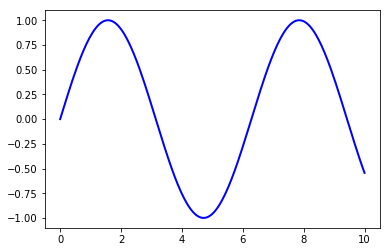

In [3]:
import matplotlib.pyplot as plt
import numpy as np
x = np.linspace(0, 10, 200)
y = np.sin(x)
plt.plot(x, y, 'b-', linewidth=2)
plt.show()

### The Object-Oriented API

The API described above is simple and convenient, but also somewhat limited and un-Pythonic

For example, in the function calls, a lot of objects get created and passed around without making themselves known to the programmer

Python programmers tend to prefer a more explicit style of programming (type import this in the IPython (or Python) shell and look at the second line)

This leads us to the alternative, object oriented Matplotlib API

Here’s the code corresponding to the preceding figure using the object-oriented API

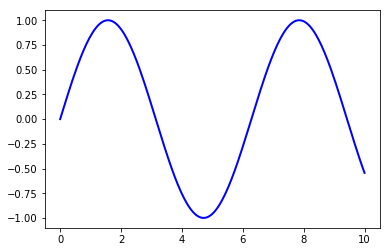

In [4]:
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots()
x = np.linspace(0, 10, 200)
y = np.sin(x)
ax.plot(x, y, 'b-', linewidth=2)
plt.show()

While there’s a bit more typing, the more explicit use of objects gives us more fine-grained control

This will become more clear as we go along

Incidentally, regarding the above lines of code,

* the form of the import statement import matplotlib.pyplot as plt is standard

* Here the call fig, ax = plt.subplots() returns a pair, where

    * fig is a Figure instance—like a blank canvas
    * ax is an AxesSubplot instance—think of a frame for plotting in

* The plot() function is actually a method of ax

#### Tweaks

Here we’ve changed the line to red and added a legend

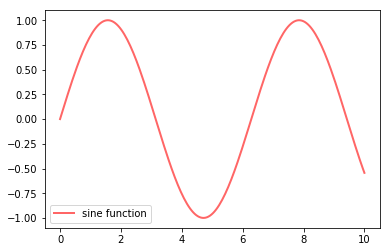

In [4]:
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots()
x = np.linspace(0, 10, 200)
y = np.sin(x)
ax.plot(x, y, 'r-', linewidth=2, label='sine function', alpha=0.6)
ax.legend()
plt.show()

We’ve also used alpha to make the line slightly transparent—which makes it look smoother

The location of the legend can be changed by replacing ax.legend() with ax.legend(loc='upper center')

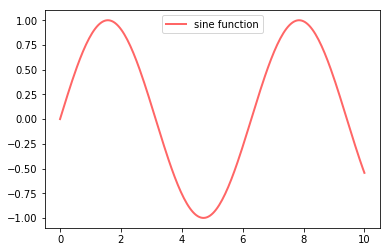

In [1]:
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots()
x = np.linspace(0, 10, 200)
y = np.sin(x)
ax.plot(x, y, 'r-', linewidth=2, label='sine function', alpha=0.6)
ax.legend(loc='upper center')
plt.show()

If everthing is properly configured, then adding LaTeX is trivial

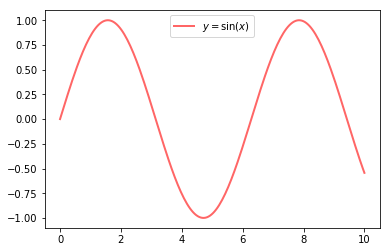

In [2]:
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots()
x = np.linspace(0, 10, 200)
y = np.sin(x)
ax.plot(x, y, 'r-', linewidth=2, label=r'$y=\sin(x)$', alpha=0.6)
ax.legend(loc='upper center')
plt.show()

Controlling the ticks, adding titles and so on is also straightforward

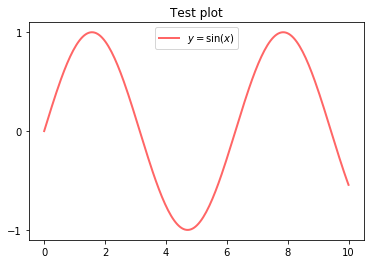

In [9]:
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots()
x = np.linspace(0, 10, 200)
y = np.sin(x)
ax.plot(x, y, 'r-', linewidth=2, label=r'$y=\sin(x)$', alpha=0.6)
ax.legend(loc='upper center')
ax.set_yticks([-1, 0, 1])
ax.set_title('Test plot')
plt.show()

## More Features

Matplotlib has a huge array of functions and features, which you can discover over time as you have need for them

We mention just a few

### Multiple Plots on One Axis

It’s straightforward to generate mutiple plots on the same axes

Here’s an example that randomly generates three normal densities and adds a label with their mean

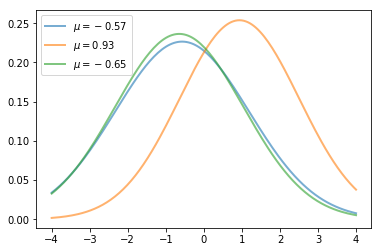

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from random import uniform

fig, ax = plt.subplots()
x = np.linspace(-4, 4, 150)
for i in range(3):
    m, s = uniform(-1, 1), uniform(1, 2)
    y = norm.pdf(x, loc=m, scale=s)
    current_label = r'$\mu = {0:.2f}$'.format(m)
    ax.plot(x, y, linewidth=2, alpha=0.6, label=current_label)
ax.legend()
plt.show()

### Multiple Subplots

Sometimes we want multiple subplots in one figure

Here’s an example that generates 6 histograms

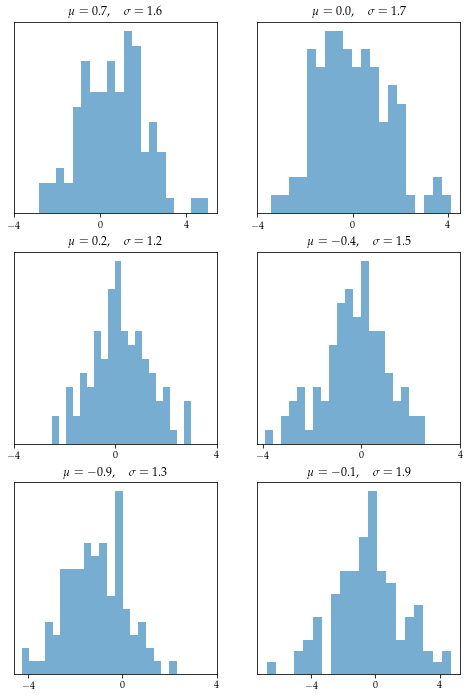

In [8]:
import matplotlib.pyplot as plt
from scipy.stats import norm
from random import uniform
num_rows, num_cols = 3, 2
fig, axes = plt.subplots(num_rows, num_cols, figsize=(8, 12))
for i in range(num_rows):
    for j in range(num_cols):
        m, s = uniform(-1, 1), uniform(1, 2)
        x = norm.rvs(loc=m, scale=s, size=100)
        axes[i, j].hist(x, alpha=0.6, bins=20)
        t = r'$\mu = {0:.1f}, \quad \sigma = {1:.1f}$'.format(m, s)
        axes[i, j].set_title(t)
        axes[i, j].set_xticks([-4, 0, 4])
        axes[i, j].set_yticks([])
plt.show()

In fact the preceding figure was generated by the code above preceded by the following three lines

In [7]:
from matplotlib import rc
rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

Depending on your LaTeX installation, this may or may not work for you — try experimenting and see how you go

### 3D Plots

Matplotlib does a nice job of 3D plots — here is one example

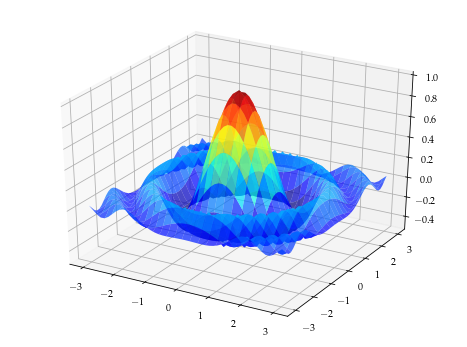

In [16]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D
import numpy as np
from matplotlib import cm


def f(x, y):
    return np.cos(x**2 + y**2) / (1 + x**2 + y**2)

xgrid = np.linspace(-3, 3, 50)
ygrid = xgrid
x, y = np.meshgrid(xgrid, ygrid)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x,
                y,
                f(x, y),
                rstride=2, cstride=2,
                cmap=cm.jet,
                alpha=0.7,
                linewidth=0.25)
ax.set_zlim(-0.5, 1.0)
plt.show()

### A Customizing Function

Perhaps you will find a set of customizations that you regularly use

Suppose we usually prefer our axes to go through the origin, and to have a grid

Here’s a nice example from this blog of how the object-oriented API can be used to build a custom subplots function that implements these changes

Read carefully through the code and see if you can follow what’s going on

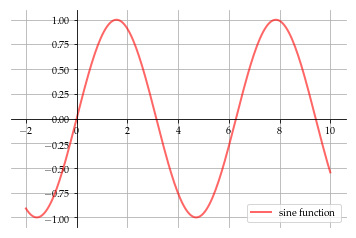

In [14]:
import matplotlib.pyplot as plt
import numpy as np


def subplots():
    "Custom subplots with axes throught the origin"
    fig, ax = plt.subplots()

    # Set the axes through the origin
    for spine in ['left', 'bottom']:
        ax.spines[spine].set_position('zero')
    for spine in ['right', 'top']:
        ax.spines[spine].set_color('none')

    ax.grid()
    return fig, ax


fig, ax = subplots()  # Call the local version, not plt.subplots()
x = np.linspace(-2, 10, 200)
y = np.sin(x)
ax.plot(x, y, 'r-', linewidth=2, label='sine function', alpha=0.6)
ax.legend(loc='lower right')
plt.show()

The custom subplots function

1. calls the standard plt.subplots function internally to generate the fig, ax pair,
2. makes the desired customizations to ax, and
3. passes the fig, ax pair back to the calling code

## Further Reading

1. The Matplotlib gallery provides many examples
2. A nice Matplotlib tutorial by Nicolas Rougier, Mike Muller and Gael Varoquaux
3. mpltools allows easy switching between plot styles
4. Seaborn facilitates common statistics plots in Matplotlib

## Exercise
a) Plot $sin(x)$ and $cos(x)$ functions with $x \in [-\pi, \pi]$. Blue line for $sin$ and green line for $cos$.

b) Show the cross points of the two functions, and label their values on the x and y axes as folllows.

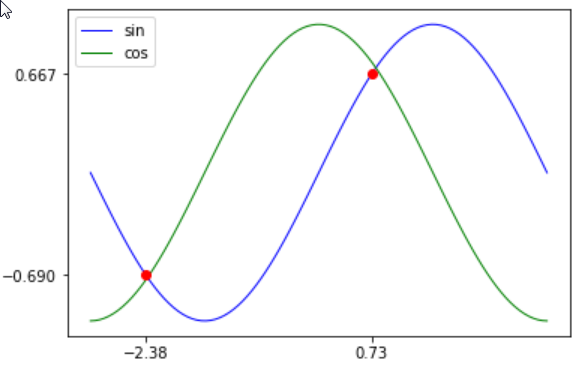

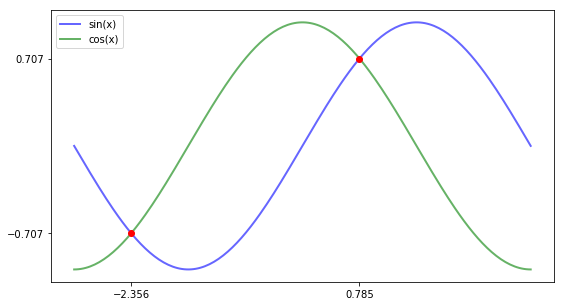

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

fig, ax = plt.subplots(figsize=(9, 5))

grid_size = 200
grid = np.linspace(- np.pi, np.pi, grid_size)

f = fsolve(lambda x: np.cos(x) - np.sin(x), 1e-5)
g = fsolve(lambda x: np.cos(x) - np.sin(x), -3)


ax.plot(grid, np.sin(grid), 'b-', lw=2, alpha=0.6, label='sin(x)')
ax.plot(grid, np.cos(grid), 'g-', lw=2, alpha=0.6, label='cos(x)')
ax.plot(f, np.sin(f), 'ro')
ax.plot(g, np.sin(g), 'ro')
ax.legend(loc='upper left')
ax.set_xticks([f, g])
ax.set_yticks([np.sin(f), np.sin(g)])

plt.show()